In [ ]:

# Lung Cancer Detection in Machine Learning
# Model Selection: Decision Tree, SVM, Random Forest 


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [29]:
# Load the dataset
train = pd.read_csv('data_lung_cancer.csv')

# Preview
train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [30]:
# Encode categorical feature
train['GENDER'] = train['GENDER'].map({'M':0, 'F':1})
train['LUNG_CANCER'] = train['LUNG_CANCER'].map({'NO':0, 'YES':1})

# Preview
train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [31]:
# Split dataset - Seprate features and target
X = train.drop('LUNG_CANCER', axis = 1)
y = train['LUNG_CANCER']

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split into train/test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, 
    y, 
    test_size=0.3, 
    random_state=42
)

In [ ]:
# Train & Evaluate ML Models

✅ Model Accuracy: 51.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.51      0.48       445
           1       0.56      0.52      0.54       548

    accuracy                           0.51       993
   macro avg       0.51      0.51      0.51       993
weighted avg       0.52      0.51      0.51       993

Cross-Validation Accuracy: 55.09%


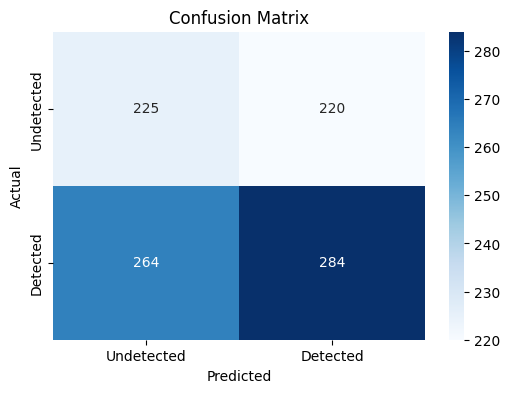

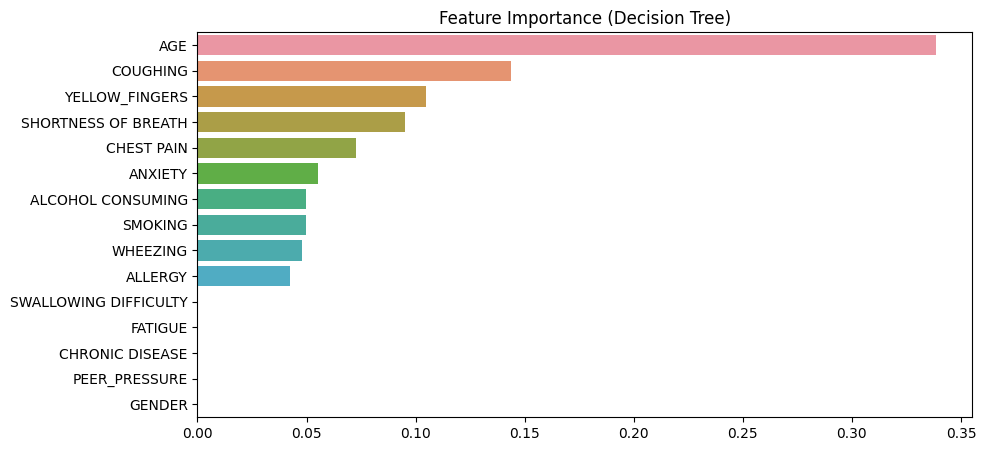

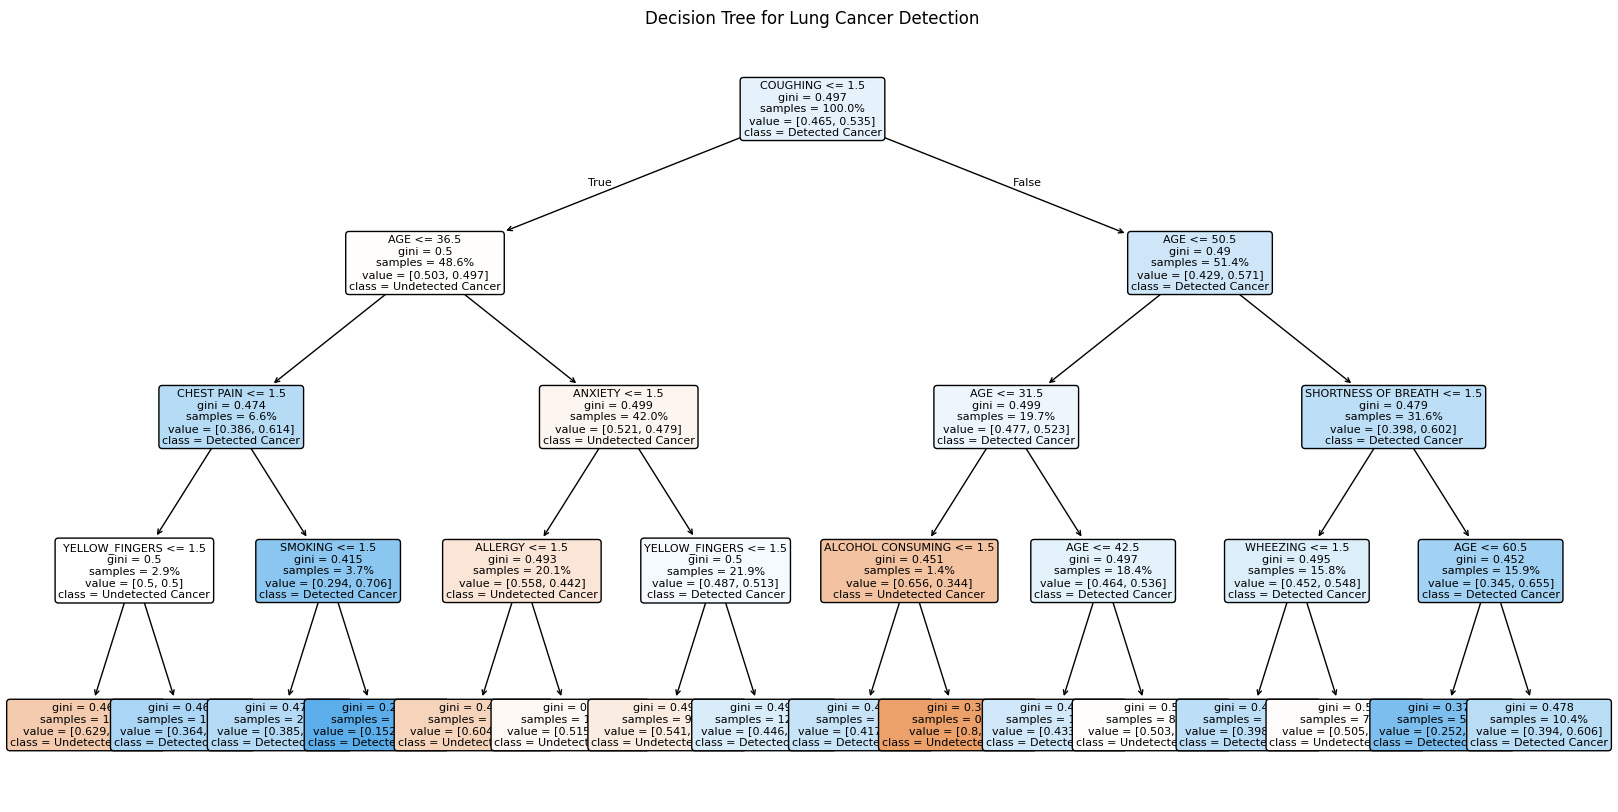

In [32]:
# Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
)

dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Undetected', 'Detected'],
            yticklabels=['Undetected', 'Detected'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# feature importance plot
importances = dt_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance (Decision Tree)")
plt.show()


# Decision Tree Graph
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['Undetected Cancer', 'Detected Cancer'],
    proportion=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Lung Cancer Detection")
plt.show()


Accuracy (Unscaled): 55.19%
SVM Accuracy with RBF Kernel: 54.58%
SVM Accuracy with Linear Kernel: 50.55%

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.49      0.39      0.44       445
           1       0.58      0.67      0.62       548

    accuracy                           0.55       993
   macro avg       0.53      0.53      0.53       993
weighted avg       0.54      0.55      0.54       993


Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       445
           1       0.55      0.53      0.54       548

    accuracy                           0.51       993
   macro avg       0.50      0.50      0.50       993
weighted avg       0.51      0.51      0.51       993

Cross-Validation Accuracy (RBF): 53.97%
Cross-Validation Accuracy (Linear): 51.64%


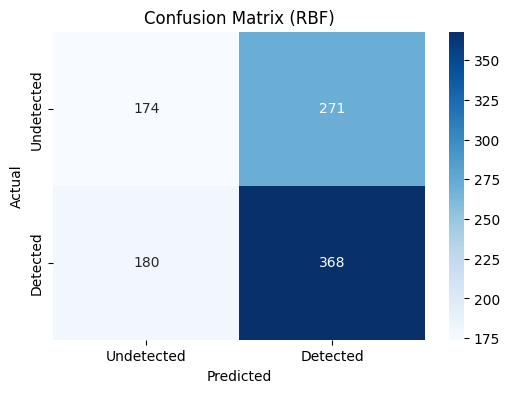

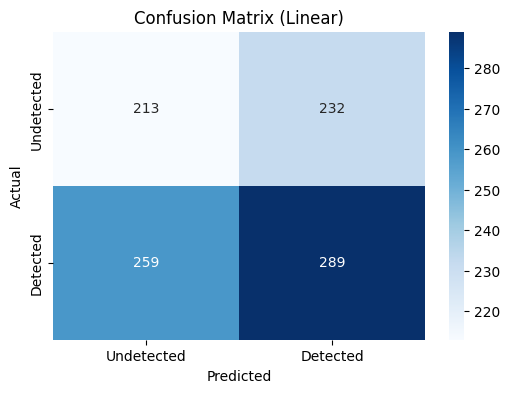

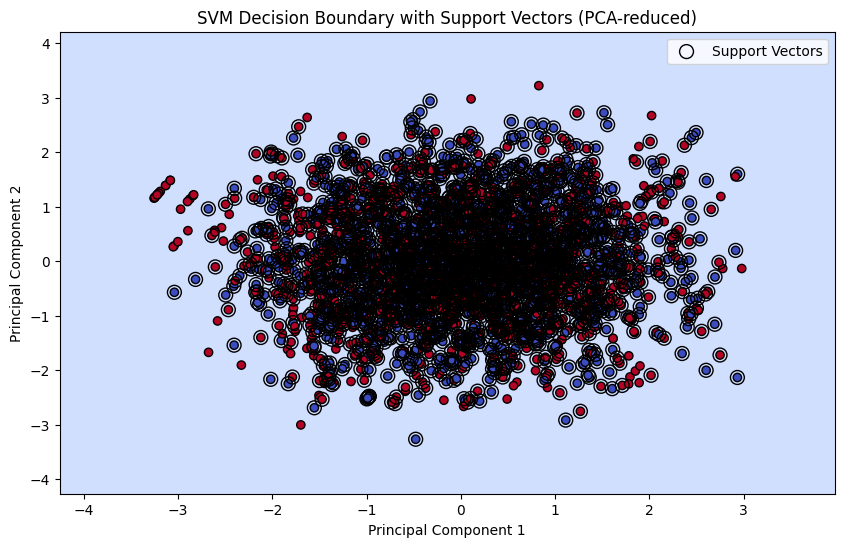

In [33]:
# SVM
# standardized features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM on unscaled data 
svm_unscaled = SVC(kernel='rbf', C=1.0)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
print(f"Accuracy (Unscaled): {accuracy_score(y_test, y_pred_unscaled):.2%}")

#train SVM with rbf kernel, C=1.0, gamme='scale', random_state=42
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

#train SVM with linear kernel, C=1.0
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred1 = svm.predict(X_test_scaled)
y_pred2 = svm_linear.predict(X_test_scaled)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"SVM Accuracy with RBF Kernel: {accuracy1:.2%}")
print(f"SVM Accuracy with Linear Kernel: {accuracy2:.2%}")

print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred1))

print("\nClassification Report (Linear Kernel):")
print(classification_report(y_test, y_pred2))

scores_rbf = cross_val_score(svm, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy (RBF): {:.2f}%".format(scores_rbf.mean() * 100))

scores_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy (Linear): {:.2f}%".format(scores_linear.mean() * 100))

#confusion matrix of both SVM
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Undetected', 'Detected'],
            yticklabels=['Undetected', 'Detected']
)
plt.title('Confusion Matrix (RBF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Undetected', 'Detected'],
            yticklabels=['Undetected', 'Detected']
)
plt.title('Confusion Matrix (Linear)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision boundary visualization (using PCA for 2D projection)
def plot_decision_boundary():
    # Reduce to 2 dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_scaled)

    # Create grid for plotting
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Train SVM on PCA-transformed data
    #svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_pca = SVC(kernel='linear', C=1.0)
    svm_pca.fit(X_pca, y_train)

    # Predict on grid
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
    plt.scatter(svm_pca.support_vectors_[:, 0],
                svm_pca.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title('SVM Decision Boundary with Support Vectors (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

plot_decision_boundary()

In [ ]:
# Random Forest

